In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g1 = pd.read_csv('gen1.csv')
g1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
Name     151 non-null object
Type1    151 non-null object
Type2    62 non-null object
Tier     138 non-null object
HP       151 non-null int64
Atk      151 non-null int64
Def      151 non-null int64
SpA      151 non-null int64
SpD      151 non-null int64
Spe      151 non-null int64
dtypes: int64(6), object(4)
memory usage: 11.9+ KB


In [3]:
del g1['SpD']
g1['Total'] = g1.HP + g1.Atk + g1.Def + g1.SpA + g1.Spe

In [12]:
g1.Tier.fillna('NA')
g1.head(20)

,Name,Type1,Type2,Tier,HP,Atk,Def,SpA,Spe,Total
0,Abra,Psychic,NaN,LC,25,20,15,105,90,255
1,Aerodactyl,Flying,Rock,UU,80,105,65,60,130,440
2,Alakazam,Psychic,NaN,OU,55,50,45,135,120,405
3,Arbok,Poison,NaN,UU,60,85,69,65,80,359
4,Arcanine,Fire,NaN,UU,90,110,80,80,95,455
5,Articuno,Flying,Ice,UU,90,85,100,125,85,485
6,Beedrill,Bug,Poison,UU,65,80,40,45,75,305
7,Bellsprout,Grass,Poison,LC,50,75,35,70,40,270
8,Blastoise,Water,NaN,UU,79,83,100,85,78,425
9,Bulbasaur,Grass,Poison,LC,45,49,49,65,45,253


In [5]:
g1.sort_values('Total',ascending=False).head(10)

,Name,Type1,Type2,Tier,HP,Atk,Def,SpA,Spe,Total
82,Mewtwo,Psychic,NaN,Uber,106,110,90,154,130,590
81,Mew,Psychic,NaN,Uber,100,100,100,100,100,500
26,Dragonite,Dragon,Flying,UU,91,134,95,100,80,500
83,Moltres,Fire,Flying,UU,90,100,90,125,90,495
149,Zapdos,Electric,Flying,OU,90,90,85,125,100,490
5,Articuno,Flying,Ice,UU,90,85,100,125,85,485
18,Cloyster,Ice,Water,OU,50,95,180,85,70,480
50,Gyarados,Flying,Water,UU,95,125,79,100,81,480
35,Exeggutor,Grass,Psychic,OU,95,95,85,125,55,455
4,Arcanine,Fire,NaN,UU,90,110,80,80,95,455


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

def _radar_factory(num_vars):
    theta = 2*np.pi * np.linspace(0, 1-1./num_vars, num_vars)
    theta += np.pi/2

    def unit_poly_verts(theta):
        x0, y0, r = [0.5] * 3
        verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
        return verts

    class RadarAxes(PolarAxes):
        name = 'radar'
        RESOLUTION = 1

        def fill(self, *args, **kwargs):
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(theta * 180/np.pi, labels)

        def _gen_axes_patch(self):
            verts = unit_poly_verts(theta)
            return plt.Polygon(verts, closed=True, edgecolor='k')

        def _gen_axes_spines(self):
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            verts.append(verts[0])
            path = Path(verts)
            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta

def radar_graph(title='', labels = [], values = [], optimum = []):
    N = len(labels) 
    theta = _radar_factory(N)
    max_val = max(max(optimum), max(values))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='radar')
    ax.plot(theta, values, color='k')
    ax.plot(theta, optimum, color='r')
    ax.set_varlabels(labels)
    ax.set_title(title + '\n')
    plt.show()

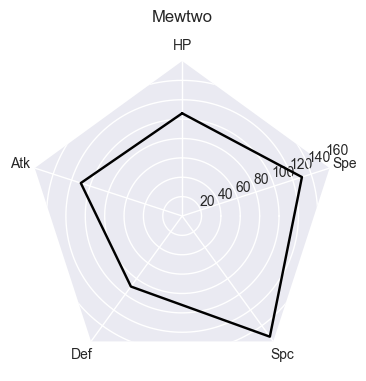

In [32]:
radar_graph(title='Mewtwo',labels=['HP','Atk','Def','Spc','Spe'], values=[106,110,90,154,130], optimum=[0,0,0,0,0])

In [11]:
g1.groupby('Tier').agg(np.mean)

,HP,Atk,Def,SpA,Spe,Total
Tier,,,,,,
LC,45.518519,55.296296,53.500000,51.222222,54.388889,259.925926
OU,95.666667,80.000000,82.666667,94.666667,77.333333,430.333333
UU,71.641791,84.731343,77.134328,78.462687,79.208955,391.179104
Uber,103.000000,105.000000,95.000000,127.000000,115.000000,545.000000
